In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,  auc, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


In [55]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [57]:
# melihat data sex dengan survived
data[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


<Axes: xlabel='Sex', ylabel='Survived'>

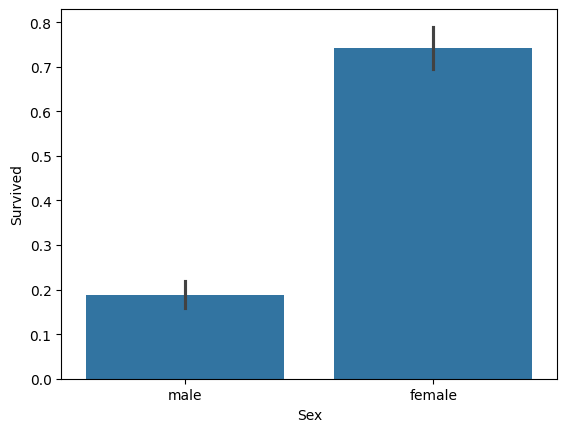

In [58]:
# plot data sex dengan survived
sns.barplot(x = 'Sex', y = 'Survived', data = data)

<Axes: xlabel='Survived', ylabel='count'>

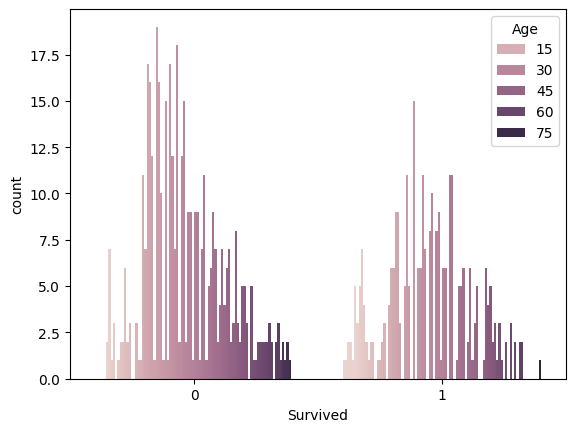

In [59]:
# plot survived berdasarkan age
sns.countplot(data, x = 'Survived', hue = 'Age')

In [60]:
# melihat data pclass dengan survived
data[['Pclass', 'Survived']].groupby('Pclass', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<Axes: xlabel='Pclass', ylabel='Survived'>

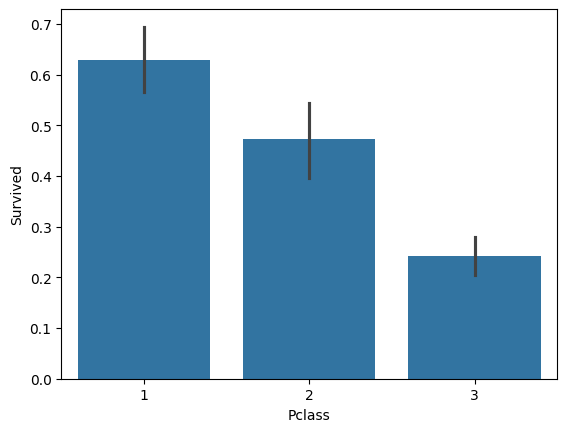

In [61]:
# plot data pclass dengan survived
sns.barplot(x = 'Pclass', y = 'Survived', data = data)

In [62]:
# melihat data embarked dengan survived
data[['Embarked', 'Survived']].groupby('Embarked', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


<Axes: xlabel='Embarked', ylabel='Survived'>

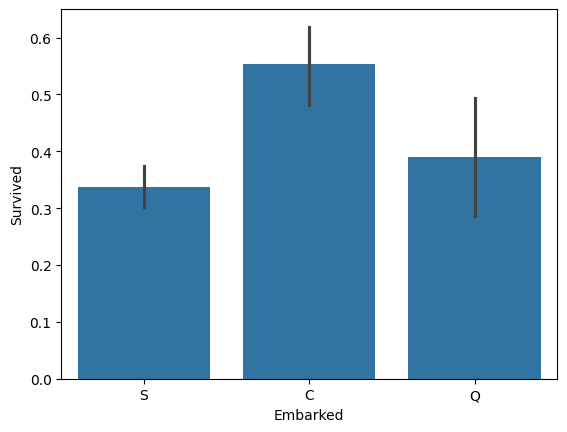

In [63]:
# plot embarked dengan survived
sns.barplot(x = 'Embarked', y = 'Survived', data = data)

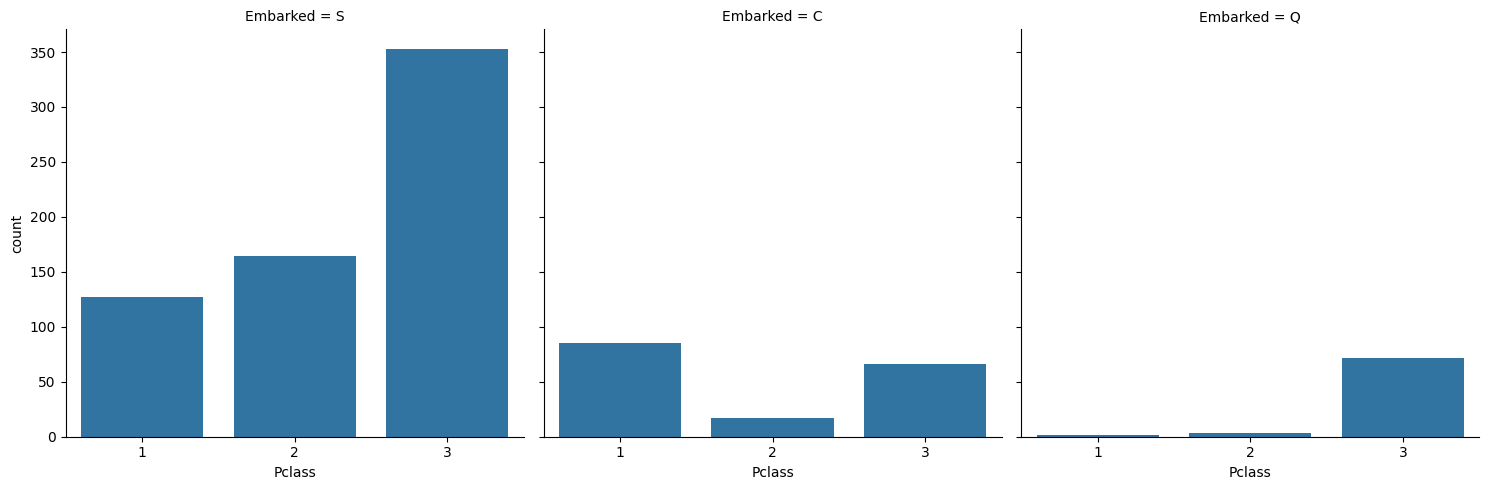

In [64]:
# plot pclass dengan embarked
sns.catplot( x = 'Pclass', col = 'Embarked', data  = data, kind = 'count')

<Axes: xlabel='Survived', ylabel='Fare'>

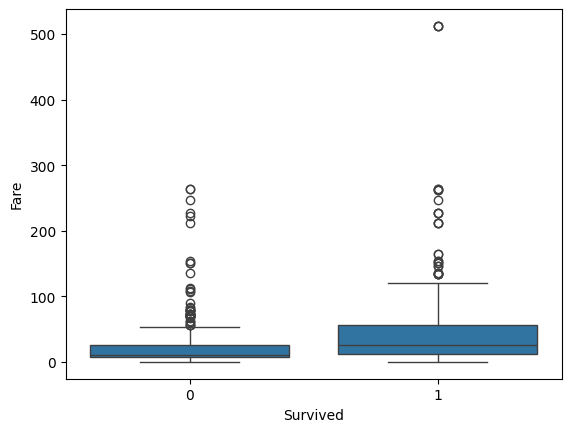

In [65]:
# plot survived dengan fare
sns.boxplot(x = 'Survived', y = 'Fare', data = data)

In [66]:
# delete variabel yang tidak diperlukan
data = data.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1)

In [67]:
# cek missing value
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

<Axes: >

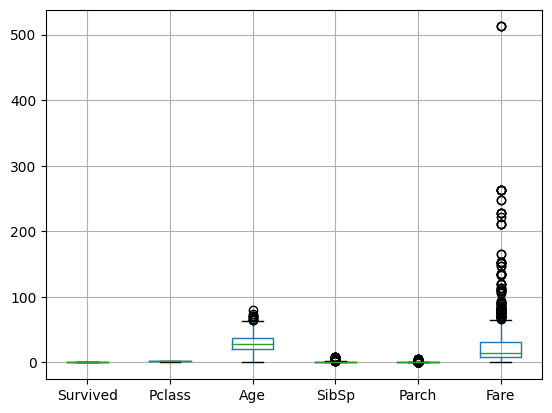

In [68]:
# cek outlier
data.boxplot()

#dikarenakan age terdapat outlier maka kita akan mengisi data dengan menggunakan median

In [69]:
# mengisi missing value

# isi missing value age dengan median
data['Age'] = data['Age'].fillna(data['Age'].median())

# isi missing value embarked dengan modus
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])


In [70]:
# encode variabel sex dan embarked

data['Sex'] = data['Sex'].replace({'female': 0, 'male': 1})

data['Embarked'] = data['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})

In [71]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


<Axes: >

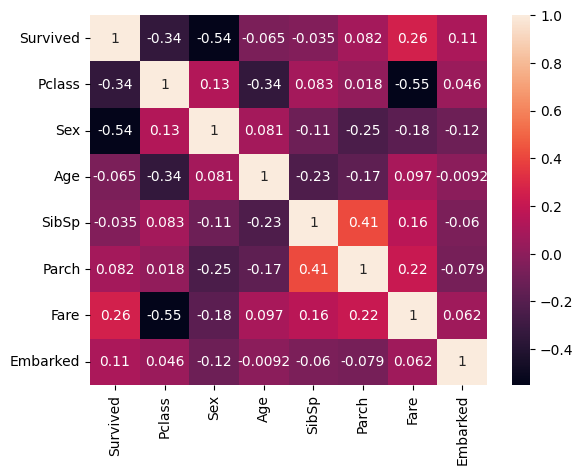

In [72]:
# melihat heatmap
sns.heatmap(data.corr(), annot=True)

In [75]:
# normalisasi dengan Robust Scaler
scaler = RobustScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

In [80]:
# split data training menjadi 70:30
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)


In [81]:
# membuat model logistic regression & NaiveBayes
model_logistic = LogisticRegression()
model_naivebayes = GaussianNB()

# train model
model_logistic.fit(X_train, y_train)
model_naivebayes.fit(X_train, y_train)

# predict
y_pred_logistic = model_logistic.predict(X_test)
y_pred_naivebayes = model_naivebayes.predict(X_test)


In [82]:
# logistic regression
print("Logistic Regression")
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_logistic))
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic))
print("Accuracy Score:", accuracy_score(y_test, y_pred_logistic))


# naive bayes
print("\nNaive Bayes")
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_naivebayes))
print("Classification Report:")
print(classification_report(y_test, y_pred_naivebayes))
print("Accuracy Score:", accuracy_score(y_test, y_pred_naivebayes))


Logistic Regression
Confusion Matrix: [[136  21]
 [ 31  80]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.79      0.72      0.75       111

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268

Accuracy Score: 0.8059701492537313

Naive Bayes
Confusion Matrix: [[131  26]
 [ 28  83]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       157
           1       0.76      0.75      0.75       111

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268

Accuracy Score: 0.7985074626865671


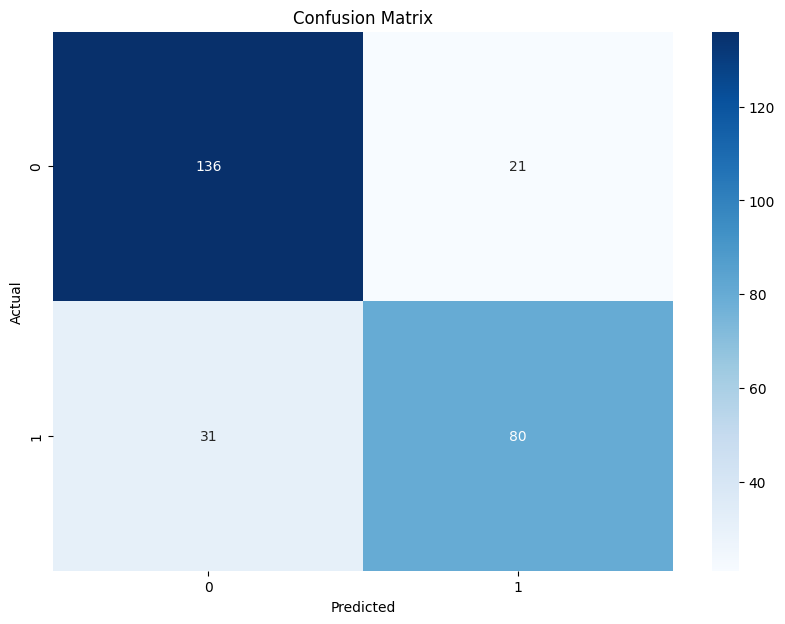

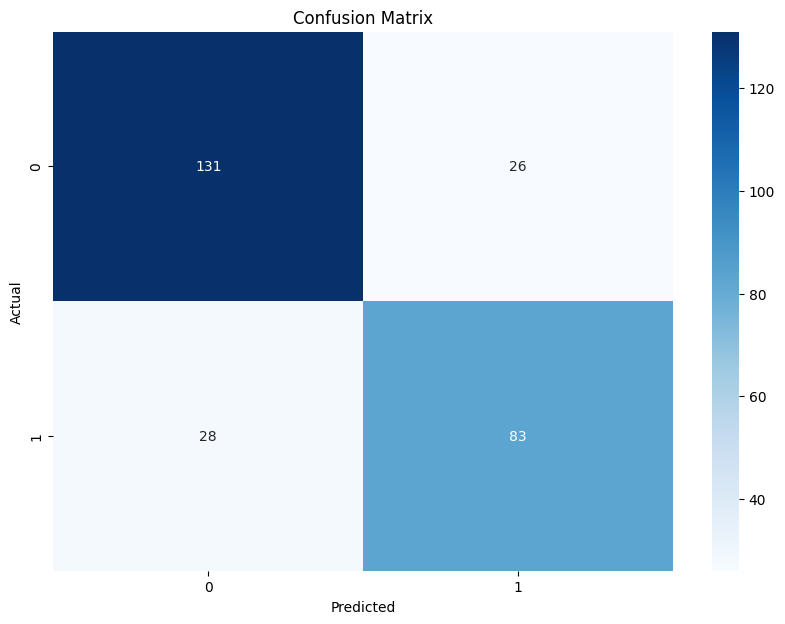

In [83]:
# plot confusion matrix

# logistic regression
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_logistic), annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# naive bayes
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_naivebayes), annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()